In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("PrePlacementdata.csv")

In [12]:
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [13]:
df.drop("sl_no", inplace=True, axis= 1)


ds = df.select_dtypes(include='number')

In [14]:
#Covariate
ds.cov()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,117.228377,60.348373,42.897137,37.659225,24.535952,1.976764e+04
hsc_p,60.348373,118.755706,34.819820,35.461678,22.555846,4.600806e+04
degree_p,42.897137,34.819820,54.151103,21.929469,17.272020,-8.064357e+03
etest_p,37.659225,35.461678,21.929469,176.251018,16.886973,1.571579e+05
mba_p,24.535952,22.555846,17.272020,16.886973,34.028376,6.611551e+04
salary,19767.643976,46008.057275,-8064.357161,157157.850783,66115.509283,5.999726e+09


In [15]:
#CovRelation

ds.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


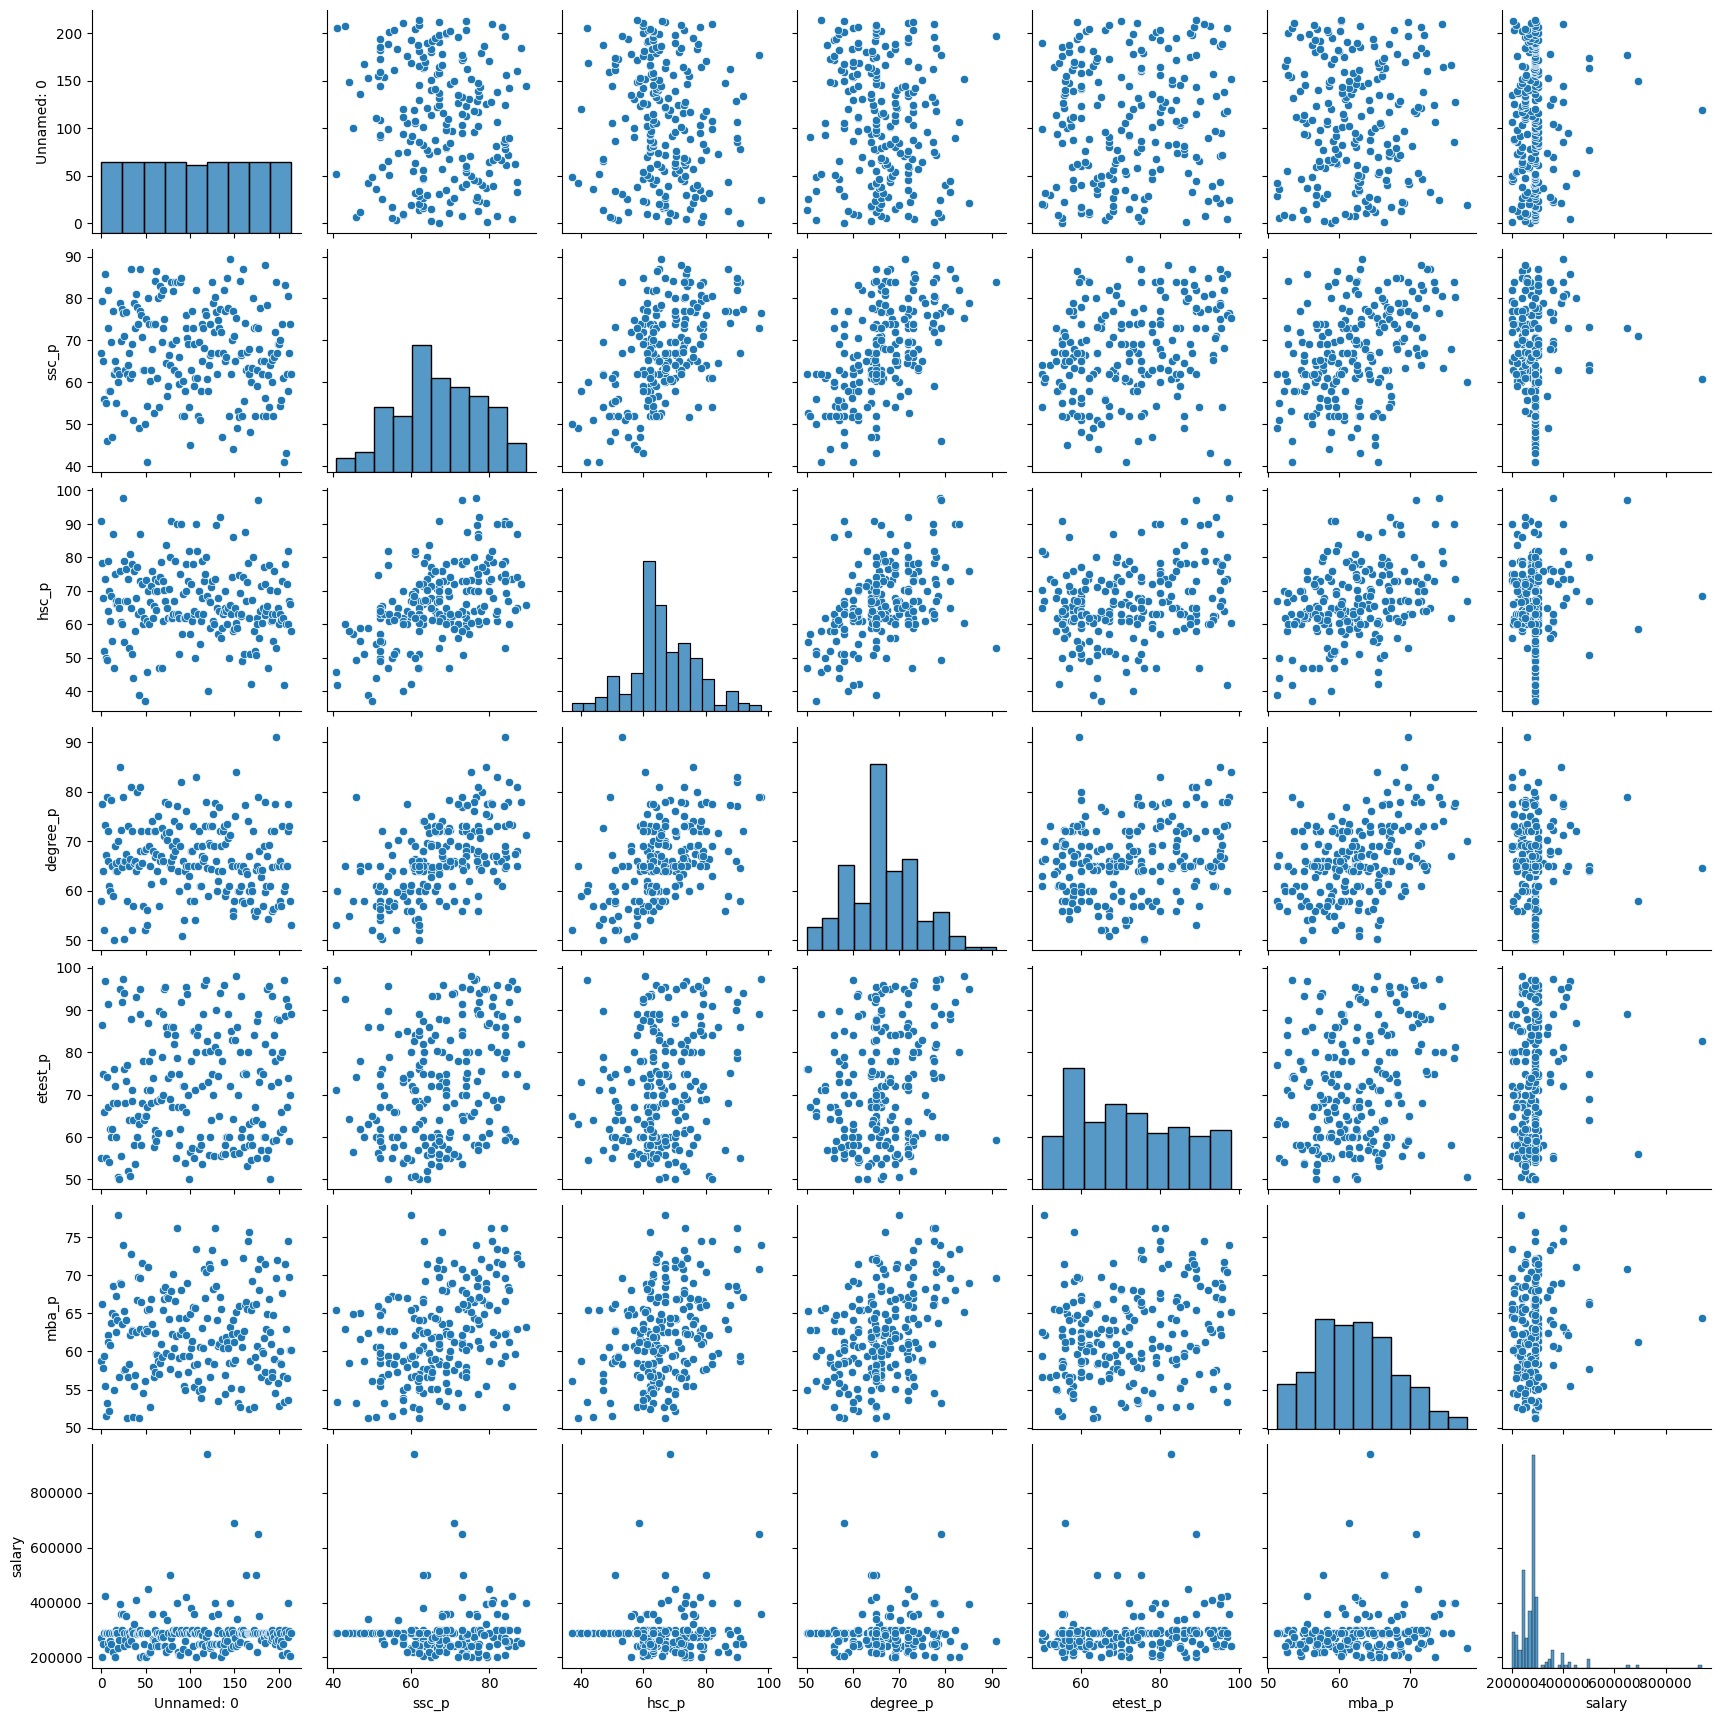

In [14]:
#MultiColinearity



import seaborn as sns
sns.pairplot(ds)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return (vif)

In [17]:
calc_vif(ds[["etest_p",'salary']])

,variables,VIF
0,etest_p,11.944567
1,salary,11.944567
